In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

In [107]:
path = os.path.abspath("")
obj = 'new'
filePath = f'{path}\\..\\{obj}\\{obj}'
inter = cv2.imread(f'{filePath}.jpg')
img = cv2.cvtColor(inter, cv2.COLOR_RGB2GRAY)

In [3]:
def noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

In [92]:
def denoise(image, iterations = 5, delta_t = 0.5, kappa = 11, kSize = 3):
    img = np.asarray(image, np.float32)

    for _ in range(iterations):
        img_dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kSize)
        img_dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kSize)

        grad_mag = np.sqrt(img_dx**2 + img_dy**2)
        c = 1 / (1 + (grad_mag / kappa)**2)

        diff_x = cv2.Sobel(c * img_dx, cv2.CV_64F, 1, 0, ksize=kSize)
        diff_y = cv2.Sobel(c * img_dy, cv2.CV_64F, 0, 1, ksize=kSize)

        img += delta_t * (diff_x + diff_y)

    img = np.clip(img, 0, 255)

    return img.astype(np.uint8)

In [93]:
def sharpen(image, sigmaX = 1, alpha = 2, beta = -15):
    sharpened_image = cv2.addWeighted(image, 1.5, cv2.GaussianBlur(image, (0, 0), sigmaX), -1, 0)
    return cv2.convertScaleAbs(sharpened_image, alpha = alpha, beta = beta)

In [5]:
def to_grey(image):
    grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.merge([grey, grey, grey])

In [113]:
def plot_images():
    orig = cv2.GaussianBlur(img, (0, 0), 1)
    #noised = noise(orig)
    st = time.time()
    denoiseds = sharpen(denoise(img))
    denoised = sharpen(denoise(orig))
    print(time.time() - st)

    #rmse1 = np.sqrt(np.mean((orig - noised) ** 2))
    #rmse2 = np.sqrt(np.mean((noised - to_grey(denoised)) ** 2))
    rmse1 = np.sqrt(np.mean((orig - denoised) ** 2))
    psnr1 = 20 * np.log10(255.0 / rmse1)

    print(f"denoise: rmse {rmse1} | psnr {psnr1}")

    rmse2 = np.sqrt(np.mean((orig - denoiseds) ** 2))
    psnr2 = 20 * np.log10(255.0 / rmse2)
    print(f"denoises: rmse {rmse2} | psnr {psnr2}")

    #rmse4 = np.sqrt(np.mean((to_grey(orig) - to_grey(denoised)) ** 2))

    # add psnr 20log10 255/rmse

    images = [
        #orig, noised, cv2.absdiff(noised, orig),
        #noised, to_grey(denoised), cv2.absdiff(noised, to_grey(denoised)),
        orig, denoised, denoiseds,
        #to_grey(orig), to_grey(denoised), cv2.absdiff(to_grey(orig), to_grey(denoised))
    ]
    image_titles = [
        # 'Original RGB image',
        # 'Noised RGB image',
        # f'Difference between original and noised RGB images\n RMSE: {rmse1:.3f}',
        # 'Noised RGB image',
        # 'Denoised grayscale image',
        # f'Difference between noised RGB and denoised grayscale images\n RMSE: {rmse2:.3f}',
        'Original RGB image',
        'Denoised grayscale image',
        f'Difference between original RGB and denoised grayscale images\n RMSE: {rmse1:.3f}\n PSNR: {psnr1:.3f}',
        # 'Original grayscale image',
        # 'Denoised grayscale image',
        # f'Difference between original grayscale and denoised grayscale images\n RMSE: {rmse4:.3f}'
    ]

    num_rows = 1
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()

    for i, (image, title) in enumerate(zip(images, image_titles)):
        axes[i].imshow(image, cmap='grey')
        axes[i].set_title(title, fontsize=12)  # Set the title
        axes[i].axis('off')  # Hide axes ticks and labels

    # If there are empty subplots, turn off the axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    #plt.savefig(f'{filePath}-comparison-plot.png', format='png', dpi=600)
    plt.show()

In [15]:
def plot_performance():
    times = []
    #noised = noise(img)
    noised = cv2.cvtColor(noise(img), cv2.COLOR_RGB2GRAY)
    for x in range(100):

        start = time.time()

        denoised_image = denoise(noised)

        times.append(time.time() - start)

    mean = np.mean(times)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(range(100), times, marker='o', label = "Iterations execution time")
    plt.plot(range(100), [mean for x in range(100)], marker='o', label = "Mean execution time")
    plt.title('Car Denoising Execution Time')
    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{filePath}-performance-plot.png', format='png', dpi=600)
    plt.show()

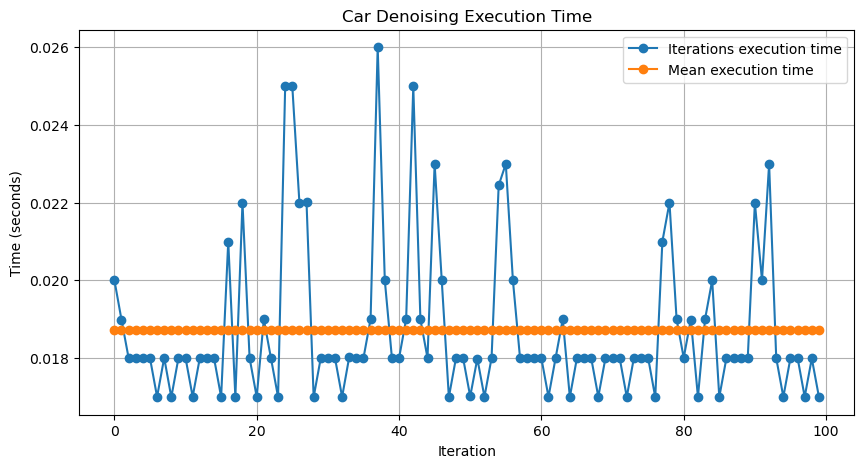

In [16]:
plot_performance()

0.008002042770385742
denoise: rmse 9.6760474170511 | psnr 28.41684384995216
denoises: rmse 10.190067128586856 | psnr 27.967262708768782


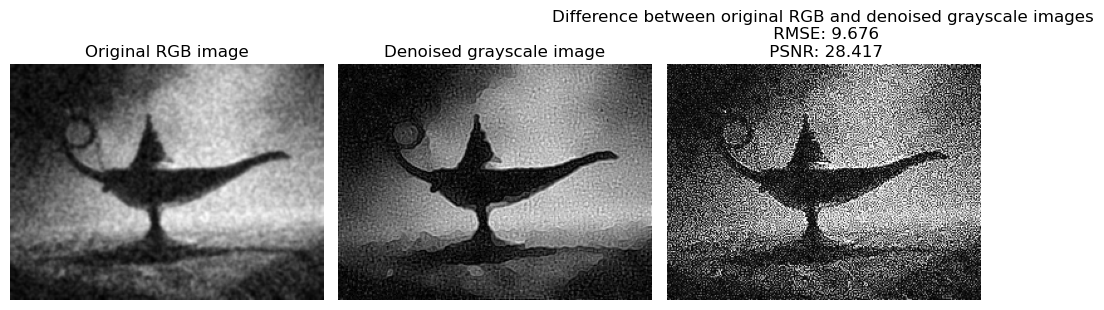

In [114]:
plot_images()